<a href="https://colab.research.google.com/github/Jules-gatete/Calculus-Assignment__PLD1/blob/main/Daily_Water_Intake_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

**loading the Data**

In [37]:
# Load the dataset
file_path = "/content/gym_members_exercise_tracking.csv"
data = pd.read_csv(file_path)

# check the first few rows of the dataset
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [38]:
#description of data
data.describe()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [39]:
# get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [40]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


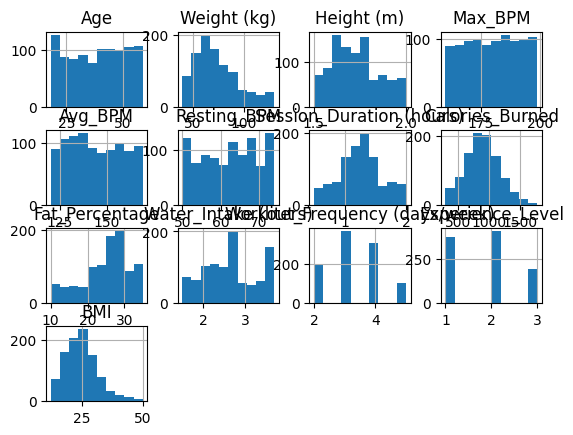

In [41]:
# plot the distribution of the data
data.hist()
plt.show()

In [42]:
# get the categorical data
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(include=['float64', 'int64'])

categorical_data.head()

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength


In [52]:

from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Workout_Type'] = label_encoder.fit_transform(data['Workout_Type'])

# displaying changes successfully made.
print(data.head())
print(data.dtypes)



   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0        

In [53]:
# see the new data
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


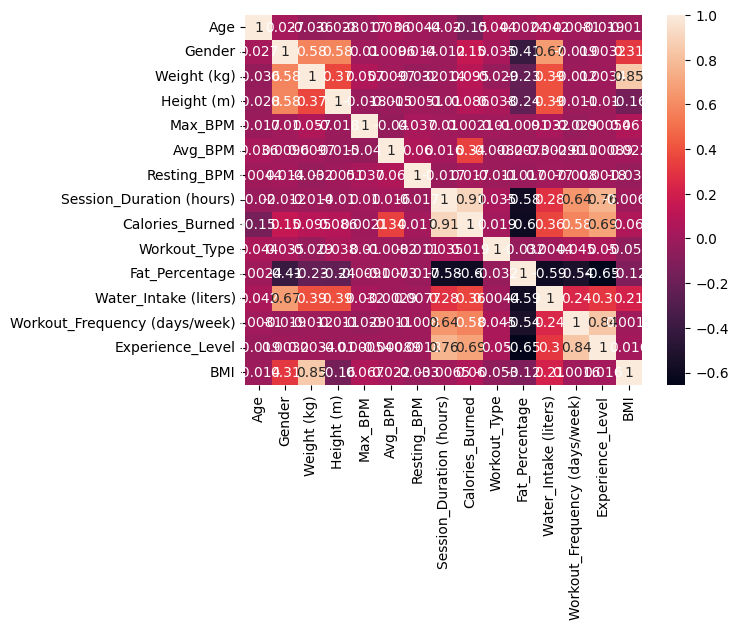

In [54]:
# plot the correlation of the data
sns.heatmap(data.corr(), annot=True)
plt.show()

In [55]:
# first get the features and target variables
X = data.drop('Water_Intake (liters)', axis=1)
y = data['Water_Intake (liters)']

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [73]:
from sklearn.preprocessing import StandardScaler
import joblib
X = data.drop(['Water_Intake (liters)' ], axis=1)
y = data['Water_Intake (liters)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=0.3)

In [63]:
X_train.shape


(681, 14)

In [66]:
from sklearn.ensemble import RandomForestRegressor  # Import the model

# Define the model
random_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
random_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [70]:
test_random = random_model.predict(X_test)

In [72]:
from sklearn import metrics  # Import metrics
import numpy as np  # Ensure numpy is imported

# Assuming test_random is the model's prediction on the test set
# R-squared error
error_score = metrics.r2_score(y_test, test_random)
print("R squared error:", error_score)

# Mean Squared Error (MSE)
random_mse = metrics.mean_squared_error(y_test, test_random)
print("Mean Squared Error of random(MSE):", random_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(random_mse)
print("Root Mean Squared Error (RMSE):", rmse)


R squared error: 0.5638061043286531
Mean Squared Error of random(MSE): 0.15758123493387868
Root Mean Squared Error (RMSE): 0.39696502986268034


In [67]:
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor

# Define the model
decision_tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [77]:
test_decision = model.predict(X_test)


In [78]:
# R-squared error
error_score = metrics.r2_score(y_test, test_decision)
print("R squared error:", error_score)

# Mean Squared Error (MSE)
random_mse = metrics.mean_squared_error(y_test, test_decision)
print("Mean Squared Error of random(MSE):", random_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(random_mse)
print("Root Mean Squared Error (RMSE):", rmse)

R squared error: 0.23139471588787563
Mean Squared Error of random(MSE): 0.26958974358974364
Root Mean Squared Error (RMSE): 0.5192203227819031


In [68]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression

# Define the model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [79]:
# Let me make a prediction
test_linear = linear_model.predict(X_test)

In [80]:
# R-squared error
error_score = metrics.r2_score(y_test, test_linear)
print("R squared error:", error_score)

# Mean Squared Error (MSE)
lr_mse = metrics.mean_squared_error(y_test, test_linear)
print("Mean Squared Error of lr(MSE):", lr_mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(lr_mse)
print("Root Mean Squared Error (RMSE):", rmse)


R squared error: -1.6300785271849003
Mean Squared Error of lr(MSE): 0.9225049715651351
Root Mean Squared Error (RMSE): 0.9604712237048725


In [ ]:
import joblib

# Save the linear model as the best-performing model
joblib.dump(linear_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")
